In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
pd.options.mode.chained_assignment = None  


In [2]:
#Read the data in a pandas dataframe
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [3]:
# See how many NaN items are present
df.isna().any(axis=1).sum()

0

In [4]:
# Let's look at the dataframe
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [5]:
# Dataframe describe to see the details of the dataset to identify outliers
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [6]:
#Drop duplicates
df[df.duplicated(keep=False)]
df = df.drop_duplicates()

In [7]:
# Shape after dropping the duplicates
df.shape

(991320, 24)

In [8]:
# let's check the outliers again
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,...,56.936984,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,...,17.238578,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [9]:
# Replace the outliers with mean +/- 3*std deviation.  So the data is tight around 99.7%
averages = dict(df._get_numeric_data().mean())
standard_dev = dict(df._get_numeric_data().std())
default_height_lower = averages['height']-3*standard_dev['height']
default_height_higher = averages['height']+3*standard_dev['height']
default_weight_lower = averages['weight']-3*standard_dev['weight']
default_weight_higher = averages['weight']+3*standard_dev['weight']
default_waist_lower = averages['waistline']-3*standard_dev['waistline']
default_waist_higher = averages['waistline']+3*standard_dev['waistline']
default_lsight_lower = averages['sight_left']-3*standard_dev['sight_left']
default_lsight_higher = averages['sight_left']+3*standard_dev['sight_left']
default_rsight_lower = averages['sight_right']-3*standard_dev['sight_right']
default_rsight_higher = averages['sight_right']+3*standard_dev['sight_right']
default_gammaGTP_lower = averages['gamma_GTP']-3*standard_dev['gamma_GTP']
default_gammaGTP_higher = averages['gamma_GTP']+3*standard_dev['gamma_GTP']
default_sgotALT_lower = averages['SGOT_ALT']-3*standard_dev['SGOT_ALT']
default_sgotALT_higher = averages['SGOT_ALT']+3*standard_dev['SGOT_ALT']
default_sgotAST_lower = averages['SGOT_AST']-3*standard_dev['SGOT_AST']
default_sgotAST_higher = averages['SGOT_AST']+3*standard_dev['SGOT_AST']
default_serum_lower = averages['serum_creatinine']-3*standard_dev['serum_creatinine']
default_serum_higher = averages['serum_creatinine']+3*standard_dev['serum_creatinine']
default_urine_lower = averages['urine_protein']-3*standard_dev['urine_protein']
default_urine_higher = averages['urine_protein']+3*standard_dev['urine_protein']
default_hemoglobin_lower = averages['hemoglobin']-3*standard_dev['hemoglobin']
default_hemoglobin_higher = averages['hemoglobin']+3*standard_dev['hemoglobin']
default_triglyceride_lower = averages['triglyceride']-3*standard_dev['triglyceride']
default_triglyceride_higher = averages['triglyceride']+3*standard_dev['triglyceride']
default_LDL_chole_lower = averages['LDL_chole']-3*standard_dev['LDL_chole']
default_LDL_chole_higher = averages['LDL_chole']+3*standard_dev['LDL_chole']
default_HDL_chole_lower = averages['HDL_chole']-3*standard_dev['HDL_chole']
default_HDL_chole_higher = averages['HDL_chole']+3*standard_dev['HDL_chole']

In [10]:
df.loc[df['height'] > default_height_higher, 'height'] = default_height_higher
df.loc[df['height'] < default_height_lower, 'height'] = default_height_lower
df.loc[df['weight'] > default_weight_higher, 'weight'] = default_weight_higher
df.loc[df['weight'] < default_weight_lower, 'weight'] = default_weight_lower
df.loc[df['waistline'] > default_waist_higher, 'waistline'] = default_waist_higher
df.loc[df['waistline'] < default_waist_lower, 'waistline'] = default_waist_lower
df.loc[df['sight_left'] > default_lsight_higher, 'sight_left'] = default_lsight_higher
df.loc[df['sight_left'] < default_lsight_lower, 'sight_left'] = default_lsight_lower
df.loc[df['sight_right'] > default_rsight_higher, 'sight_right'] = default_rsight_higher
df.loc[df['sight_right'] < default_rsight_lower, 'sight_right'] = default_rsight_lower
df.loc[df['gamma_GTP'] > default_gammaGTP_higher, 'gamma_GTP'] = default_gammaGTP_higher
df.loc[df['gamma_GTP'] < default_gammaGTP_lower, 'gamma_GTP'] = default_gammaGTP_lower
df.loc[df['SGOT_ALT'] > default_sgotALT_higher, 'SGOT_ALT'] = default_sgotALT_higher
df.loc[df['SGOT_ALT'] < default_sgotALT_lower, 'SGOT_ALT'] = default_sgotALT_lower
df.loc[df['SGOT_AST'] > default_sgotAST_higher, 'SGOT_AST'] = default_sgotAST_higher
df.loc[df['SGOT_AST'] < default_sgotAST_lower, 'SGOT_AST'] = default_sgotAST_lower
df.loc[df['serum_creatinine'] > default_serum_higher, 'serum_creatinine'] = default_serum_higher
df.loc[df['serum_creatinine'] < default_serum_lower, 'serum_creatinine'] = default_serum_lower
df.loc[df['urine_protein'] > default_urine_higher, 'urine_protein'] = default_urine_higher
df.loc[df['urine_protein'] < default_urine_lower, 'urine_protein'] = default_urine_lower
df.loc[df['hemoglobin'] > default_hemoglobin_higher, 'hemoglobin'] = default_hemoglobin_higher
df.loc[df['hemoglobin'] < default_hemoglobin_lower, 'hemoglobin'] = default_hemoglobin_lower
df.loc[df['triglyceride'] > default_triglyceride_higher, 'triglyceride'] = default_triglyceride_higher
df.loc[df['triglyceride'] < default_triglyceride_lower, 'triglyceride'] = default_triglyceride_lower
df.loc[df['LDL_chole'] > default_LDL_chole_higher, 'LDL_chole'] = default_LDL_chole_higher
df.loc[df['LDL_chole'] < default_LDL_chole_lower, 'LDL_chole'] = default_LDL_chole_lower
df.loc[df['HDL_chole'] > default_HDL_chole_higher, 'HDL_chole'] = default_HDL_chole_higher
df.loc[df['HDL_chole'] < default_HDL_chole_lower, 'HDL_chole'] = default_HDL_chole_lower
# Df Describe once again to see how the data looks now
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240944,63.246406,81.180525,0.958498,0.956124,1.031495,1.030476,122.432360,76.052549,...,56.875733,112.898463,129.033595,14.236519,1.067063,0.854222,25.550263,25.135356,34.986919,1.608112
std,14.181346,9.281689,12.383255,9.585462,0.356176,0.354689,0.174652,0.171892,14.543083,9.889334,...,14.737531,34.202698,80.737980,1.559103,0.277866,0.209481,11.607063,16.906800,33.584467,0.818504
min,20.000000,134.391797,25.741581,45.682369,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,5.221250,5.508615,1.000000,9.475038,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,100.826188,116.784142,2.798695,2.792765,2.000000,2.000000,273.000000,185.000000,...,108.652718,220.566243,438.724316,18.984583,2.407377,2.302074,96.470428,104.681877,188.407586,3.000000


In [11]:
# This would be required only if we have any na items left.  Basically replace NaN with average.  Not required in this case
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['waistline'].fillna(df['waistline'].mean(), inplace=True)
df['sight_left'].fillna(df['sight_left'].mean(), inplace=True)
df['sight_right'].fillna(df['sight_right'].mean(), inplace=True)
df['HDL_chole'].fillna(df['HDL_chole'].mean(), inplace=True)
df['LDL_chole'].fillna(df['LDL_chole'].mean(), inplace=True)
df['triglyceride'].fillna(df['triglyceride'].mean(), inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(), inplace=True)
df['serum_creatinine'].fillna(df['serum_creatinine'].mean(), inplace=True)
df['SGOT_AST'].fillna(df['SGOT_AST'].mean(), inplace=True)

# DF info to see how does the dataframe look now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  float64
 3   weight            991320 non-null  float64
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int64  
 8   hear_right        991320 non-null  int64  
 9   SBP               991320 non-null  int64  
 10  DBP               991320 non-null  int64  
 11  BLDS              991320 non-null  int64  
 12  tot_chole         991320 non-null  int64  
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        99

In [12]:
# Is null once again
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [13]:
# Data looks good now
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170.0,75.0,90.0,1.0,1.0,1,1,120,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,Y
1,Male,30,180.0,80.0,89.0,0.9,1.2,1,1,130,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3,N
2,Male,40,165.0,75.0,91.0,1.2,1.5,1,1,120,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1,N
3,Male,50,175.0,80.0,91.0,1.5,1.2,1,1,145,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1,N
4,Male,50,165.0,60.0,80.0,1.0,1.2,1,1,138,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175.0,80.0,92.1,1.5,1.5,1,1,114,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1,N
991342,Male,35,170.0,75.0,86.0,1.0,1.5,1,1,119,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1,N
991343,Female,40,155.0,50.0,68.0,1.0,0.7,1,1,110,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3,Y
991344,Male,25,175.0,60.0,72.0,1.5,1.0,1,1,119,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1,N


In [14]:
# Replace text fields with numbers
df["DRK_YN"] = df["DRK_YN"].map({"N": 0, "Y":1})
df['DRK_YN'].value_counts()

0    495844
1    495476
Name: DRK_YN, dtype: int64

In [15]:
df["sex"] = df["sex"].map({"Male": 0, "Female":1})
df['sex'].value_counts()

0    526399
1    464921
Name: sex, dtype: int64

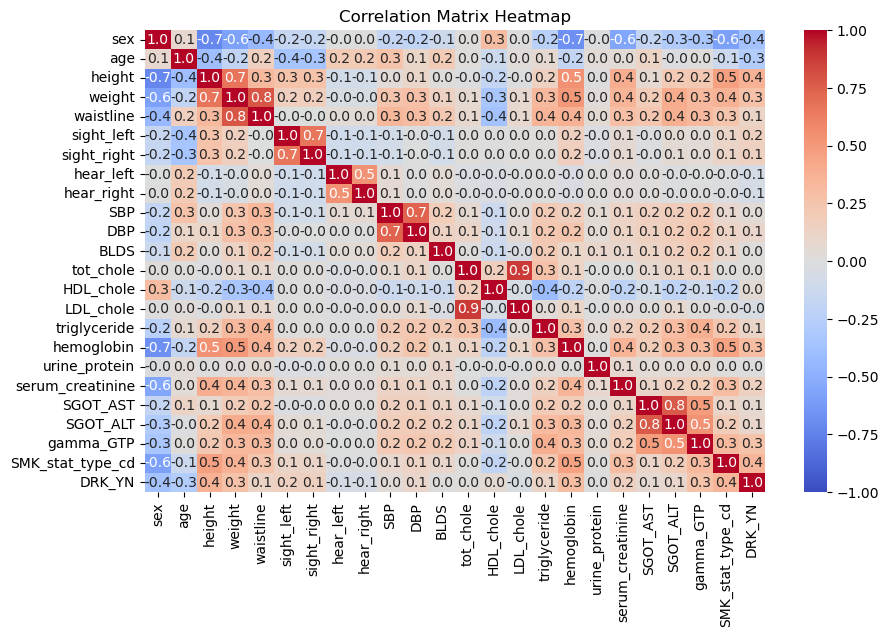

<Figure size 640x480 with 0 Axes>

In [16]:
# Let's plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Define a custom discrete colormap with intervals at 0.25 increments
cmap = sns.diverging_palette(220, 10, as_cmap=True, n=9)

# Create a cluster chart (heatmap)
plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 10, "ha": 'center'}, fmt=".1f")  # Format annotations with one decimal place
plt.title('Correlation Matrix Heatmap')
plt.show()
# Save the heatmap as an SVG file
plt.savefig('heatmap.svg', format='svg', bbox_inches='tight')

In [17]:
# Download correlation matrix so we can view it in excel as well
corr_matrix.to_csv('correlation_matrix.csv')

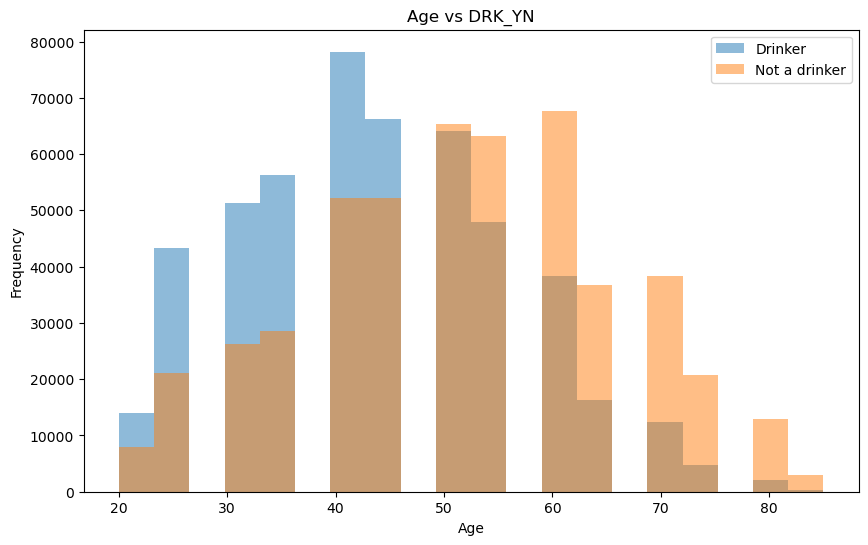

In [18]:
# Let's plot a few pairs of data - Age vs Drinker
drinker = df[df['DRK_YN'] == 1]
non_drinker = df[df['DRK_YN'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(drinker['age'], bins=20, alpha=0.5, label='Drinker')
plt.hist(non_drinker['age'], bins=20, alpha=0.5, label="Not a drinker")

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs DRK_YN')
plt.legend()
plt.show()

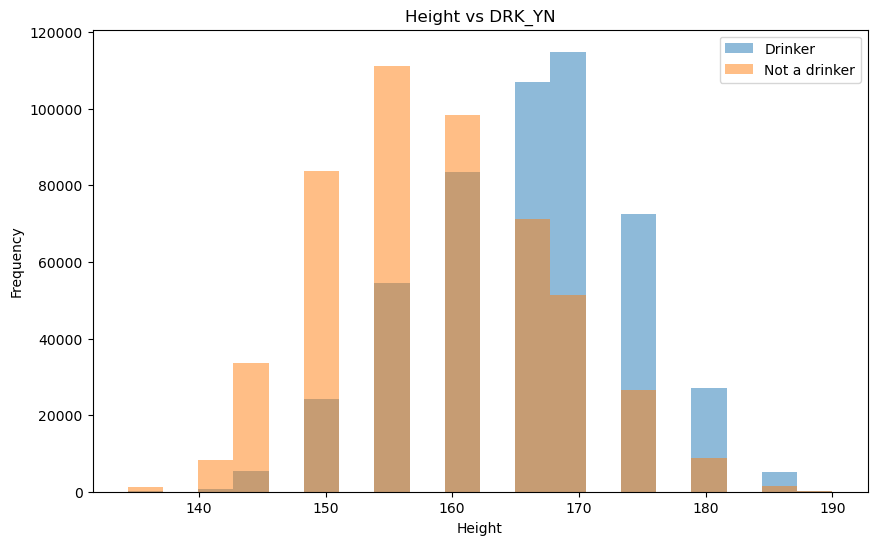

In [19]:
# Plot height vs drinker
drinker = df[df['DRK_YN'] == 1]
non_drinker = df[df['DRK_YN'] == 0]


plt.figure(figsize=(10, 6))
plt.hist(drinker['height'], bins=20, alpha=0.5, label='Drinker')
plt.hist(non_drinker['height'], bins=20, alpha=0.5, label="Not a drinker")

plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height vs DRK_YN')
plt.legend()
plt.show()

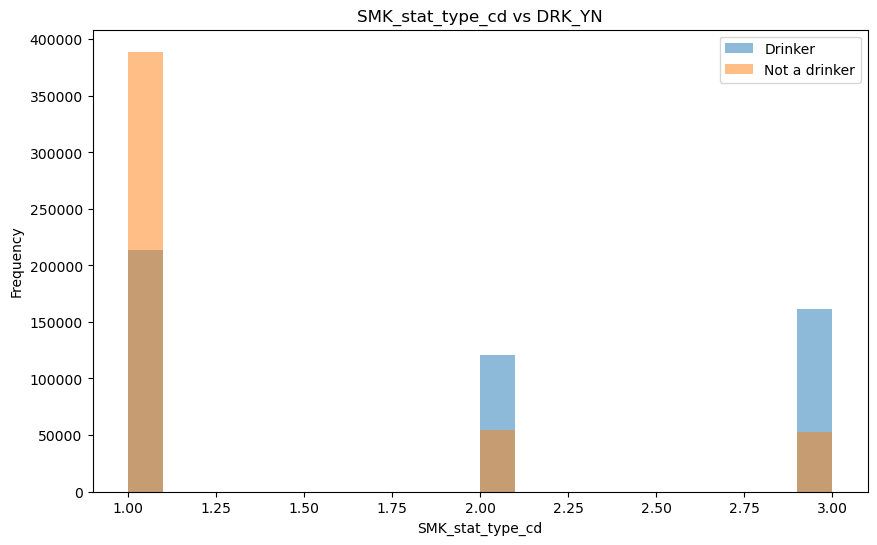

In [20]:
# Smoker vs drinker
drinker = df[df['DRK_YN'] == 1]
non_drinker = df[df['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drinker['SMK_stat_type_cd'], bins=20, alpha=0.5, label='Drinker')
plt.hist(non_drinker['SMK_stat_type_cd'], bins=20, alpha=0.5, label="Not a drinker")

plt.xlabel('SMK_stat_type_cd')
plt.ylabel('Frequency')
plt.title('SMK_stat_type_cd vs DRK_YN')
plt.legend()
plt.show()

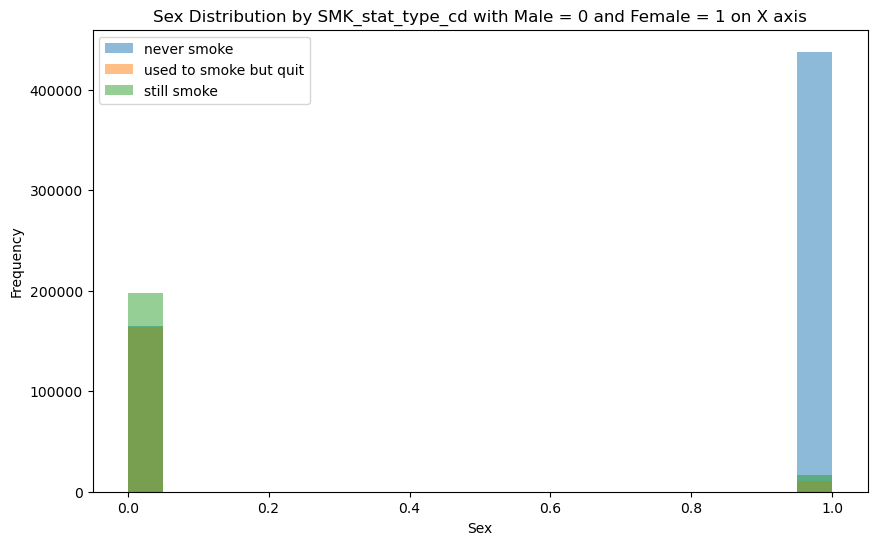

In [21]:
# Smoker vs gender
non_smoker = df[df['SMK_stat_type_cd'] == 1]
quit = df[df['SMK_stat_type_cd'] == 2]
smoker = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(non_smoker['sex'], bins=20, alpha=0.5, label='never smoke')
plt.hist(quit['sex'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smoker['sex'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution by SMK_stat_type_cd with Male = 0 and Female = 1 on X axis')
plt.legend()
plt.show()

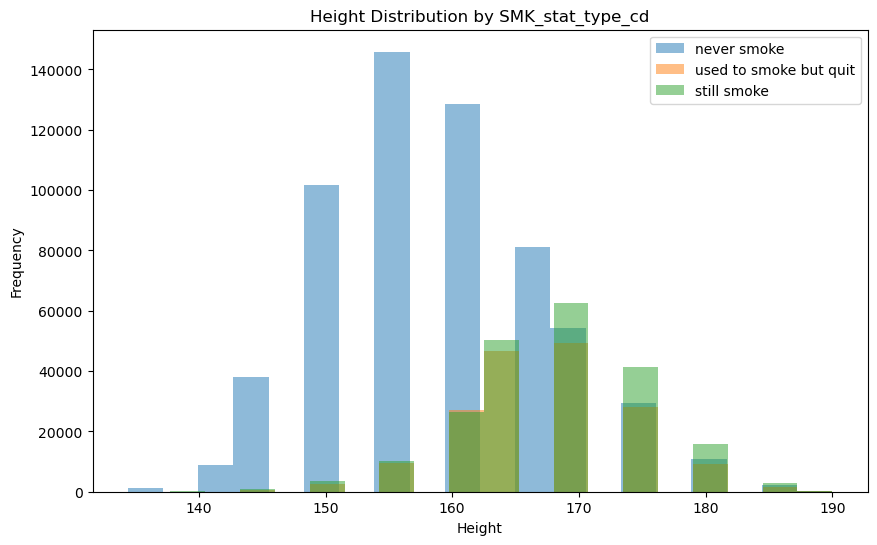

In [22]:
#Smoker vs height
non_smoker = df[df['SMK_stat_type_cd'] == 1]
quit = df[df['SMK_stat_type_cd'] == 2]
smoker = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(non_smoker['height'], bins=20, alpha=0.5, label='never smoke')
plt.hist(quit['height'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smoker['height'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

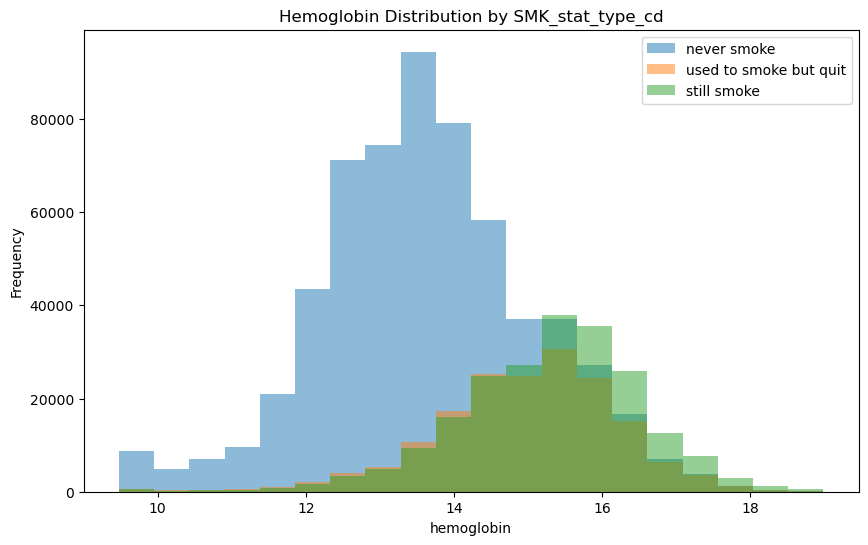

In [23]:
# Smoker vs hemoglobin
non_smoker = df[df['SMK_stat_type_cd'] == 1]
quit = df[df['SMK_stat_type_cd'] == 2]
smoker = df[df['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(non_smoker['hemoglobin'], bins=20, alpha=0.5, label='never smoke')
plt.hist(quit['hemoglobin'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smoker['hemoglobin'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('hemoglobin')
plt.ylabel('Frequency')
plt.title('Hemoglobin Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

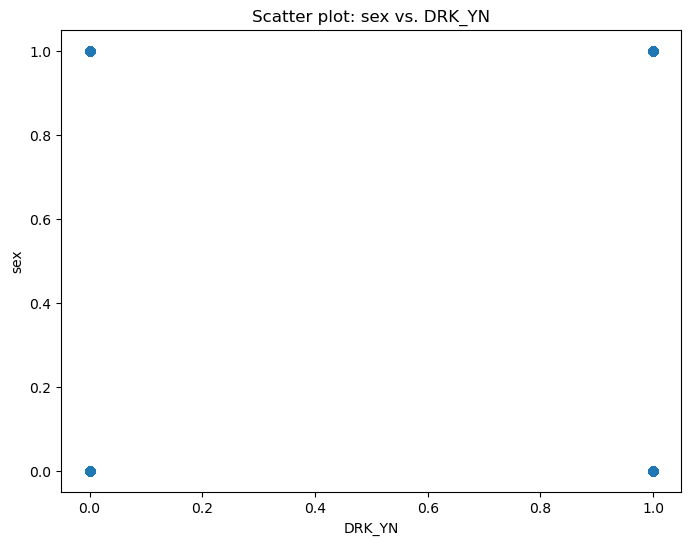

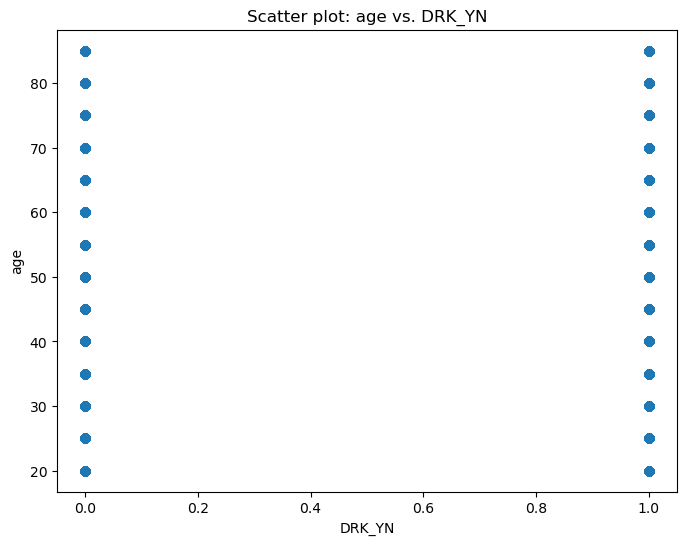

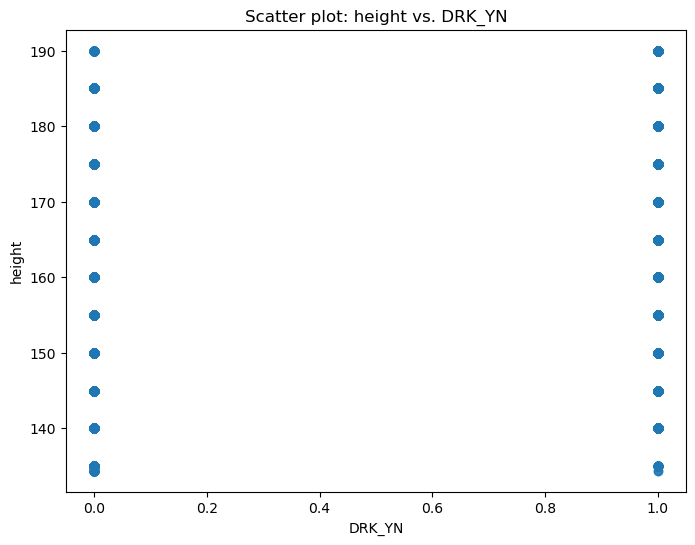

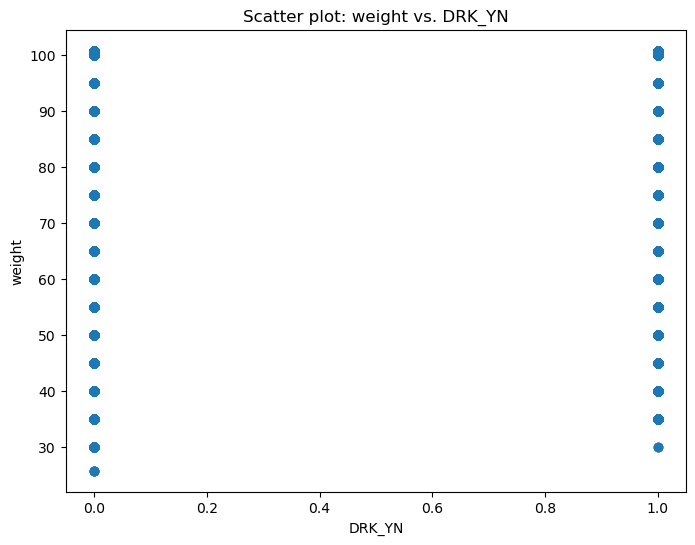

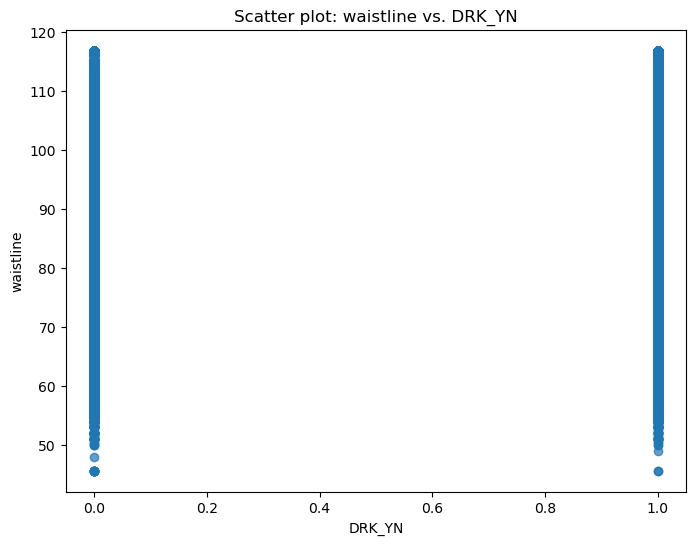

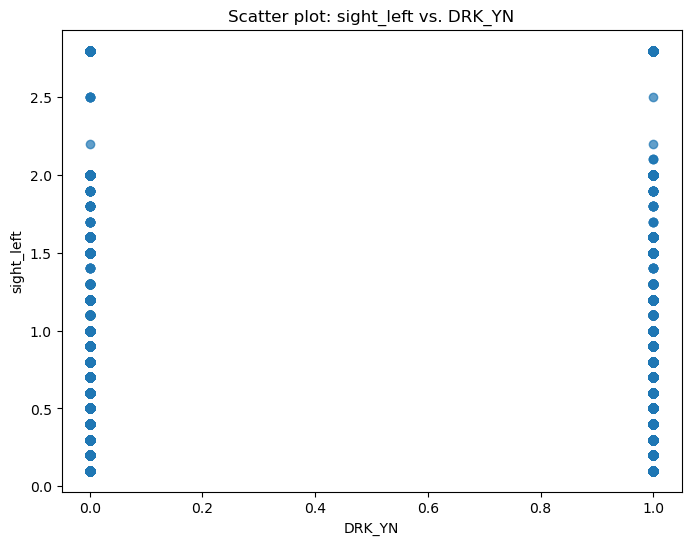

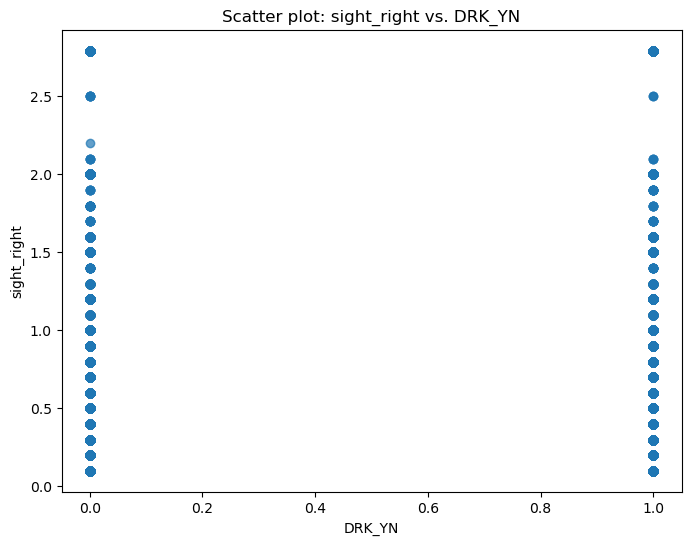

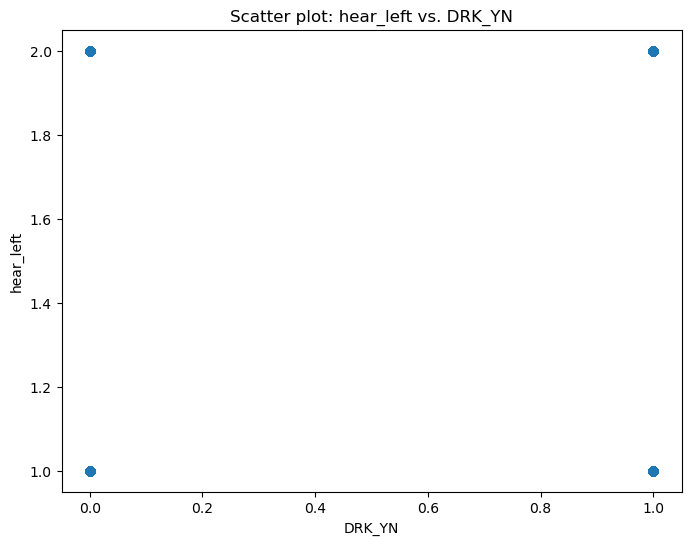

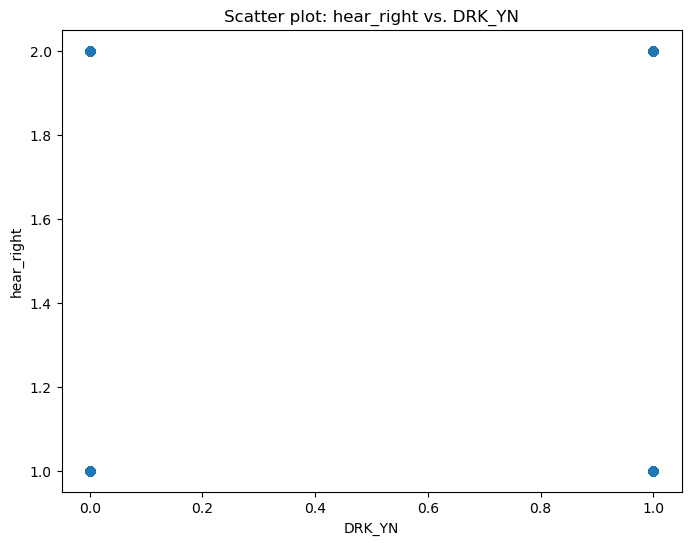

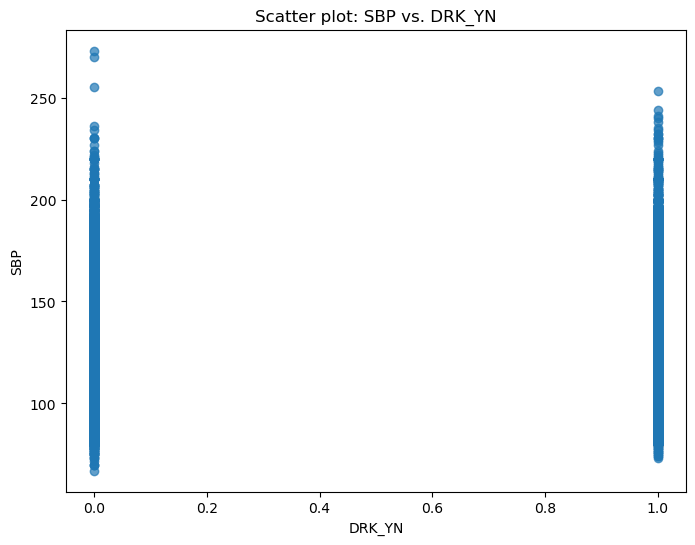

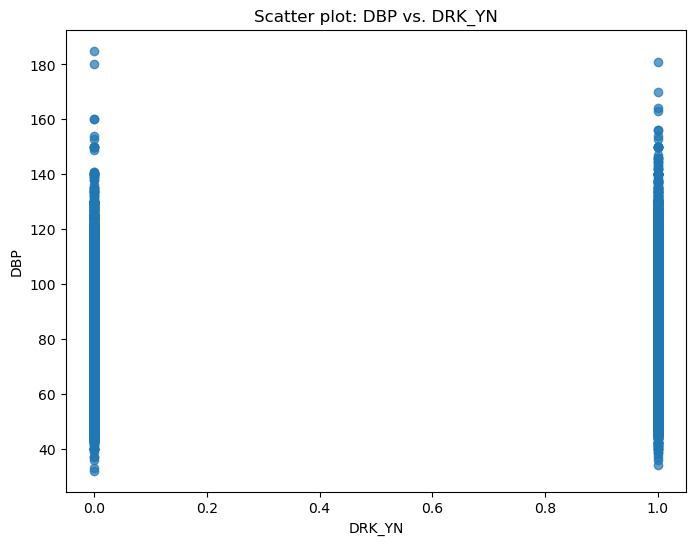

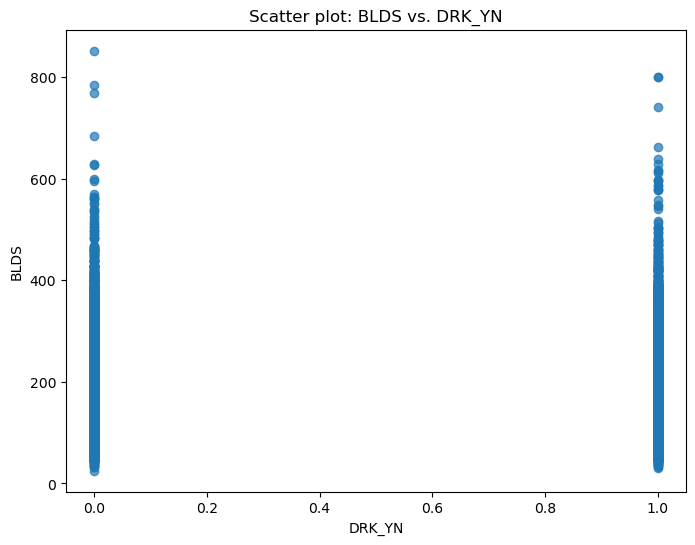

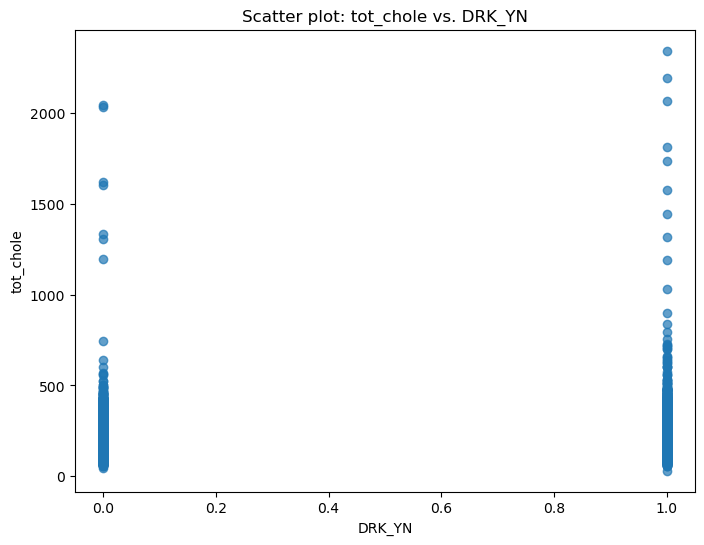

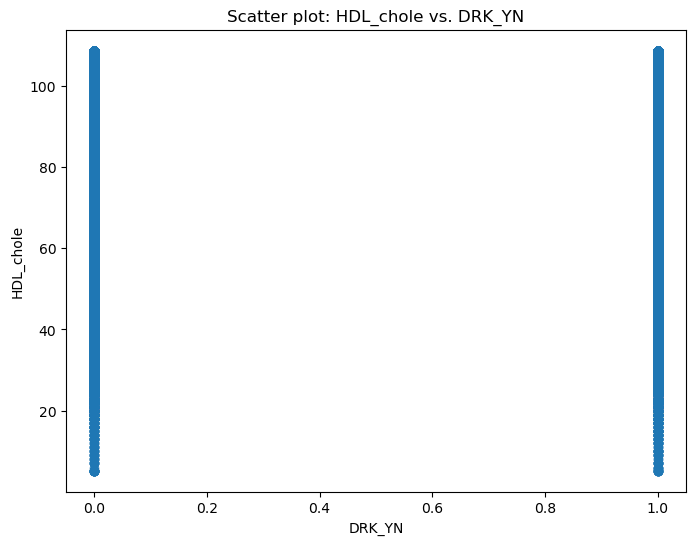

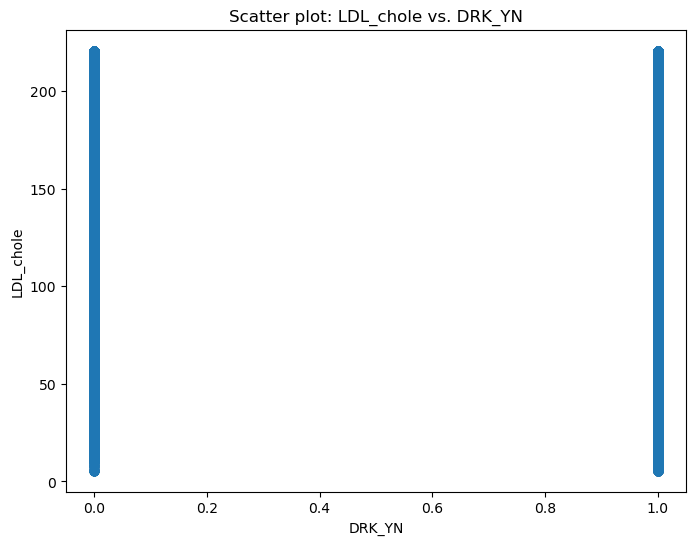

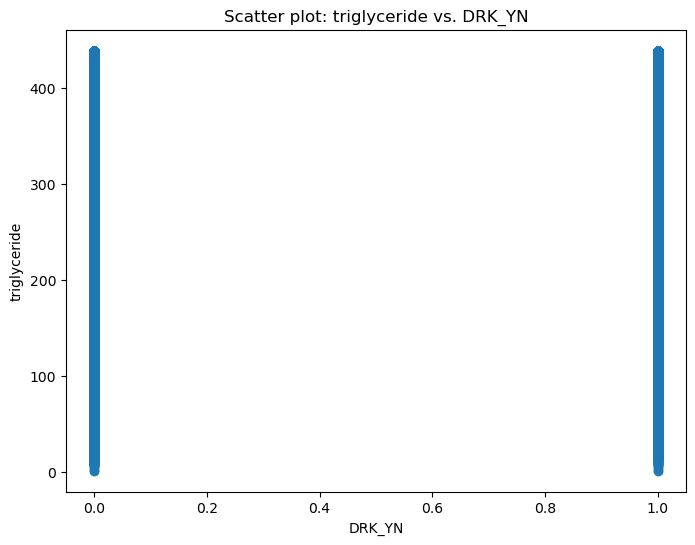

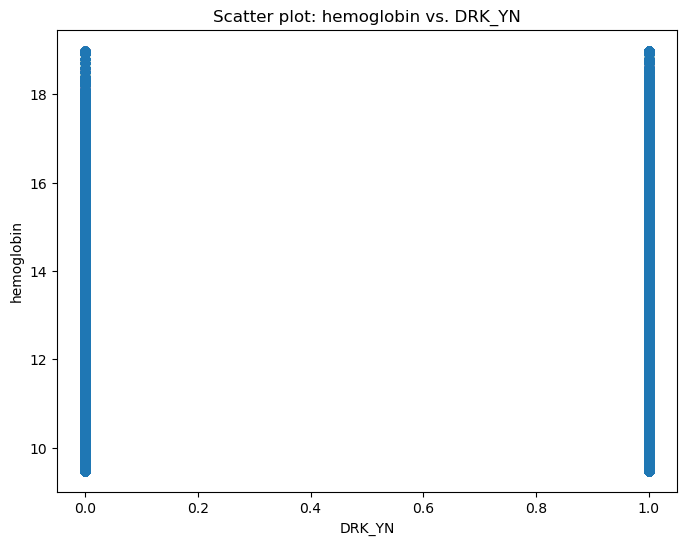

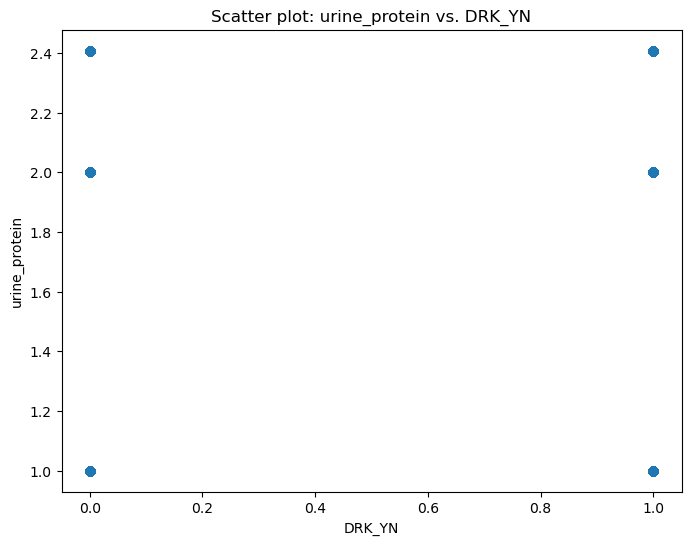

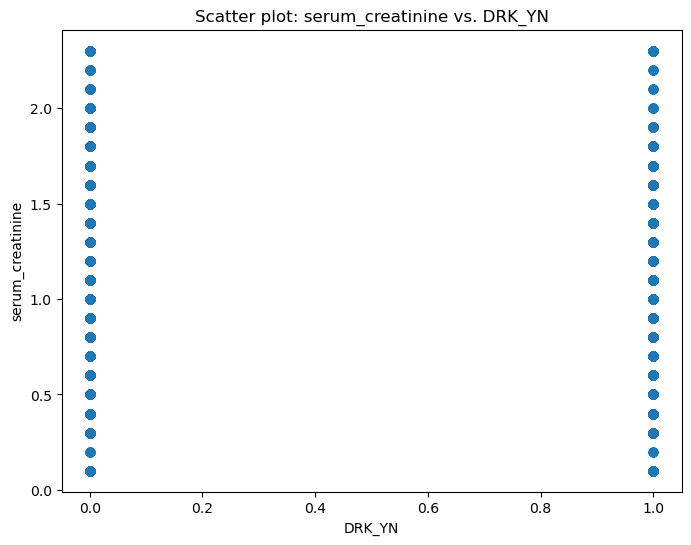

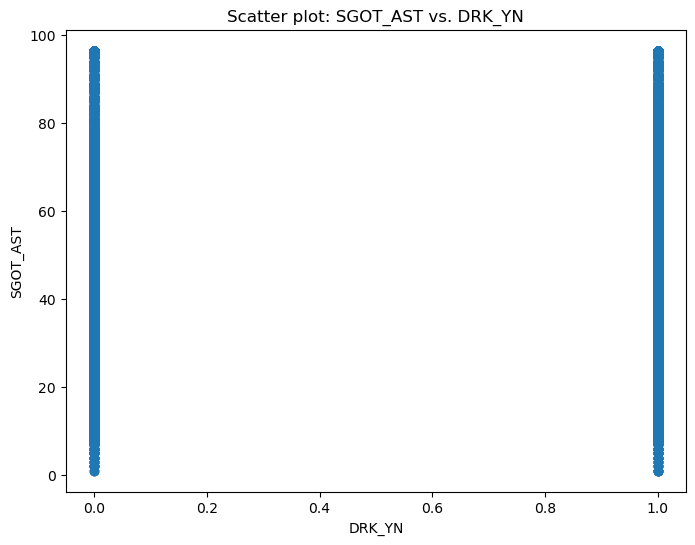

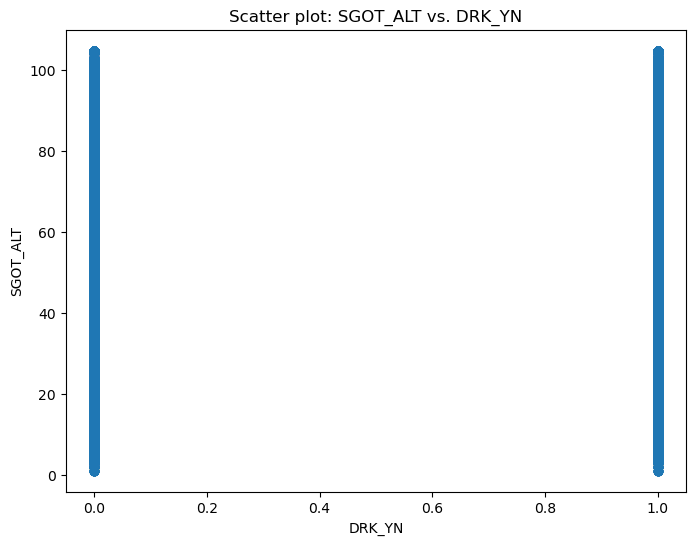

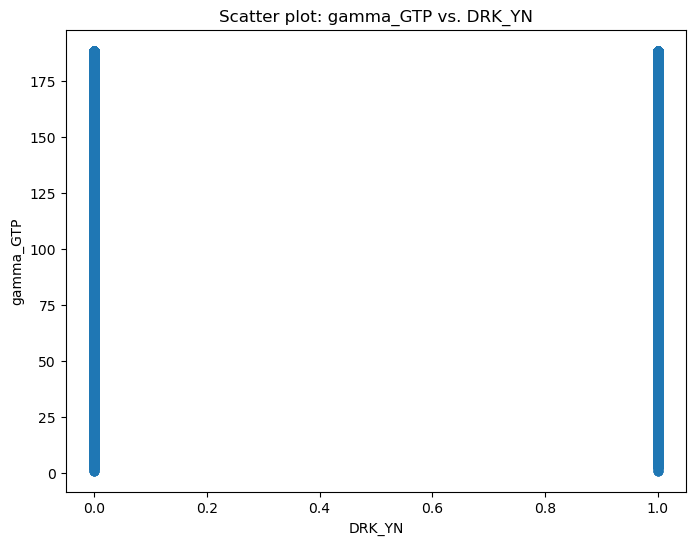

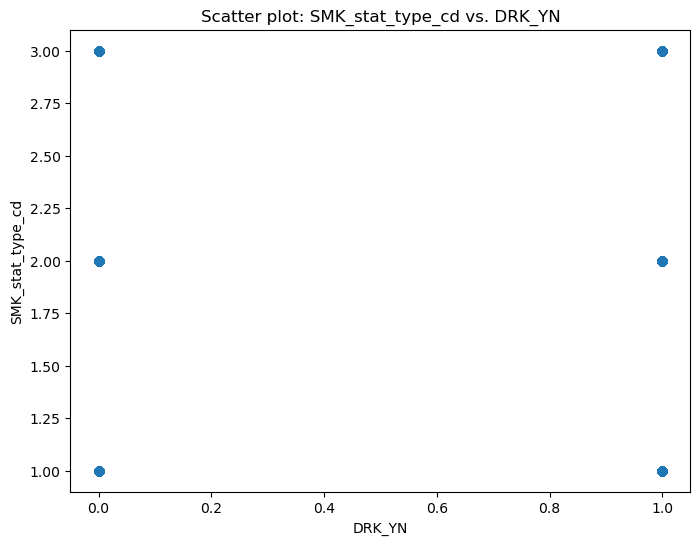

In [24]:
# A few scatter plots.. though I did not get much from this.
for independent_column in df.columns[:-1]:  # Exclude the dependent variable
    plt.figure(figsize=(8, 6))
    plt.scatter(df['DRK_YN'], df[independent_column], alpha=0.7)
    plt.title(f'Scatter plot: {independent_column} vs. DRK_YN')
    plt.xlabel('DRK_YN')
    plt.ylabel(independent_column)
    plt.show()

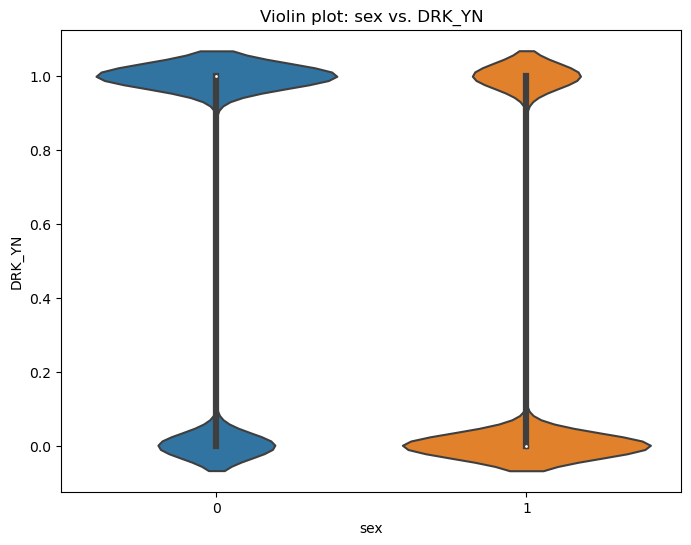

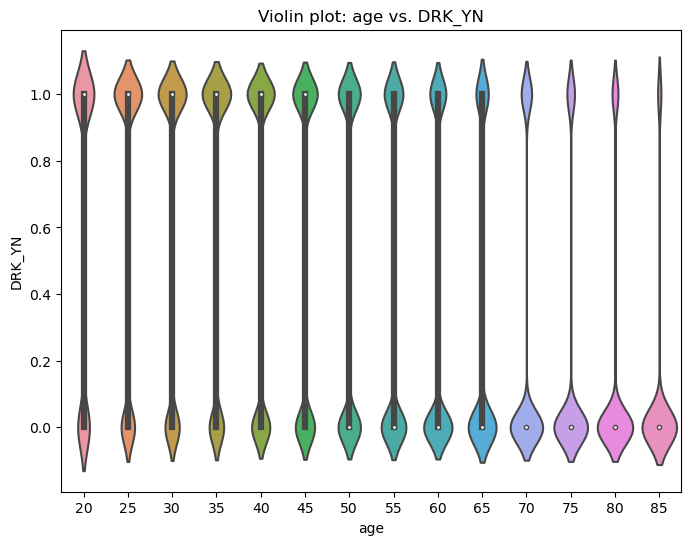

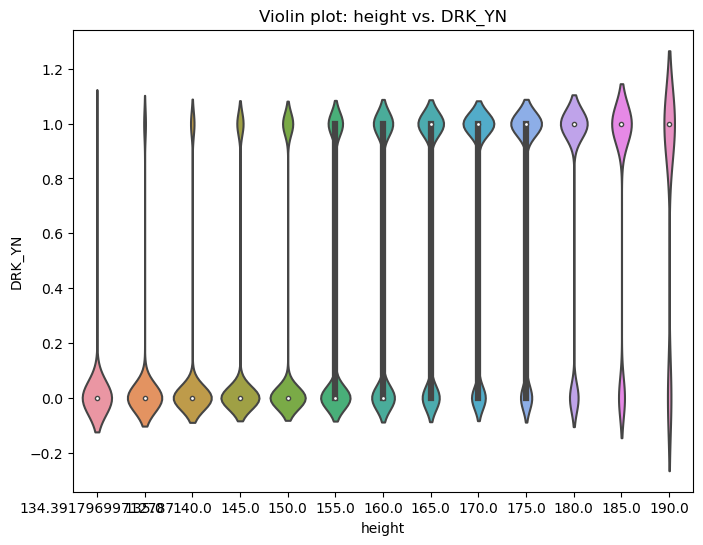

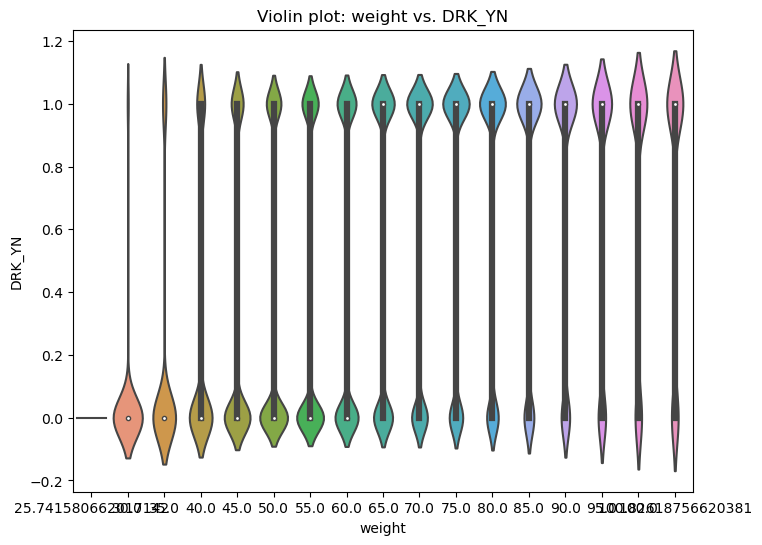

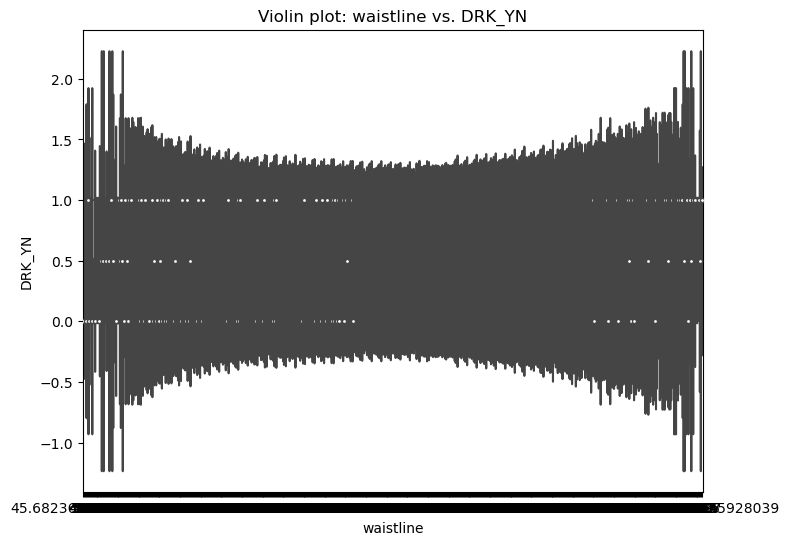

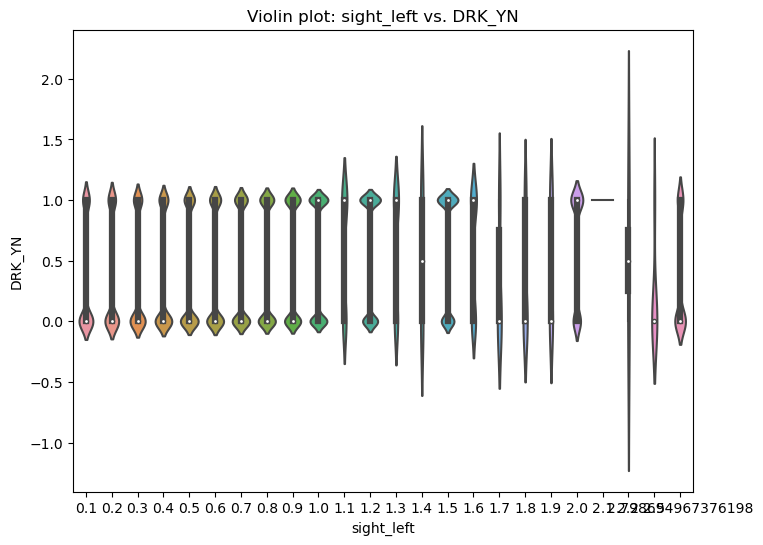

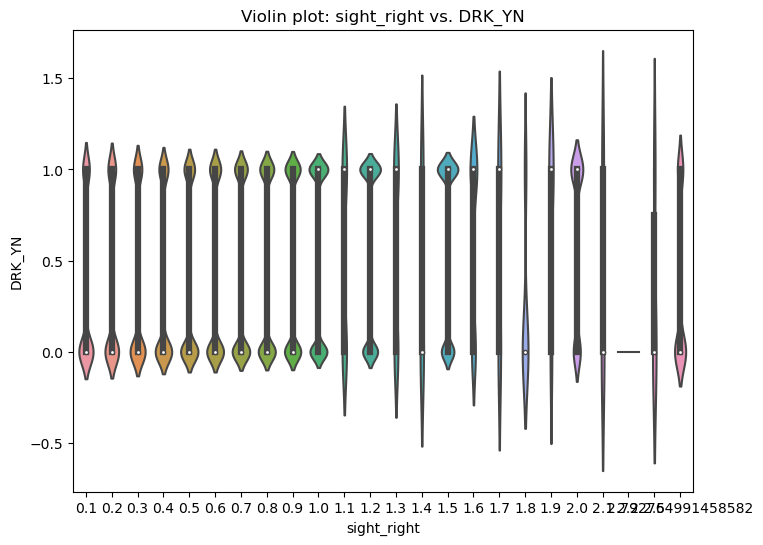

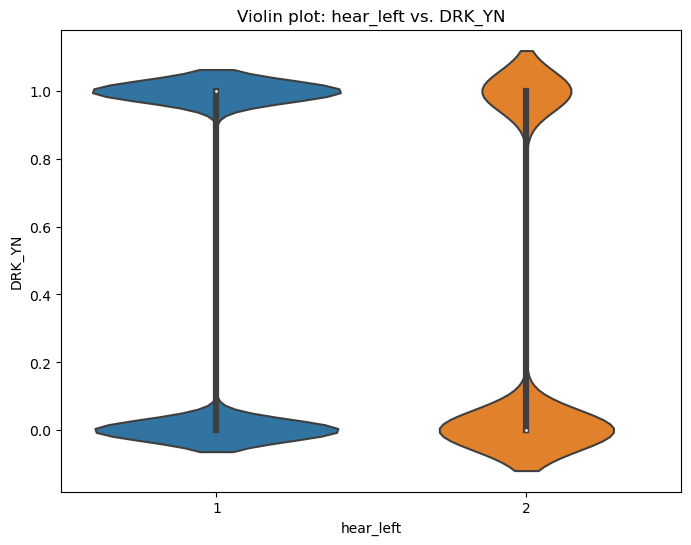

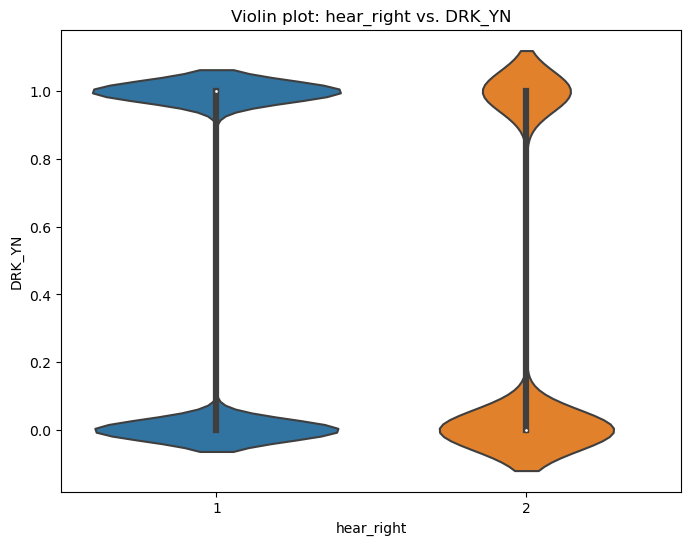

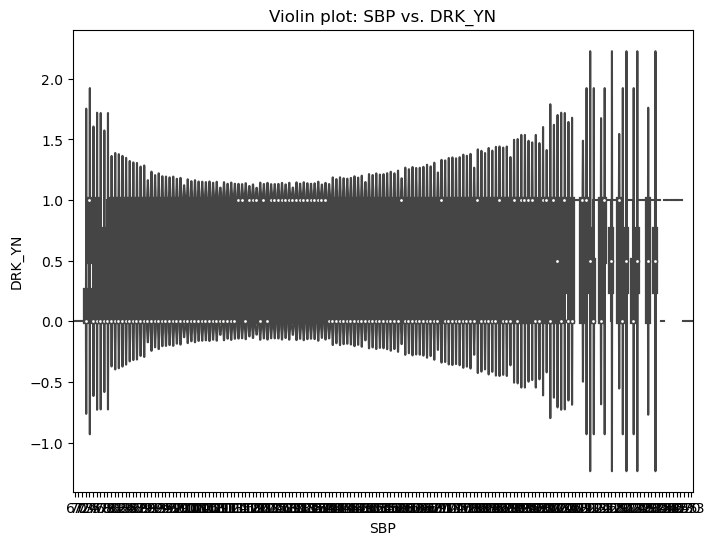

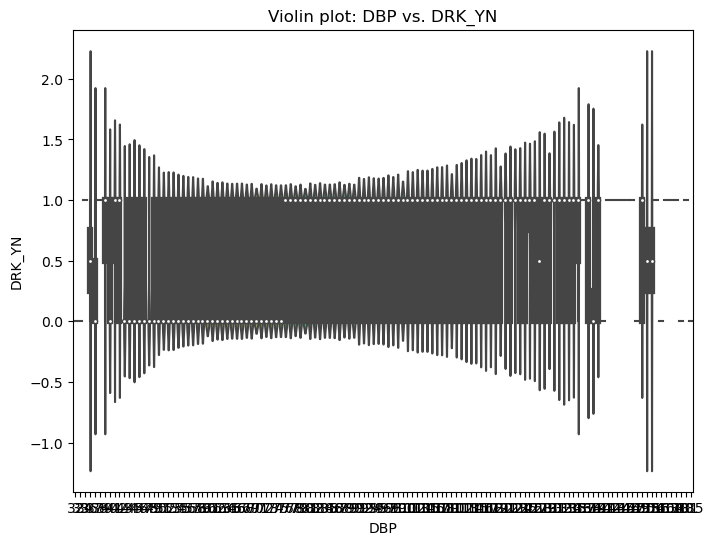

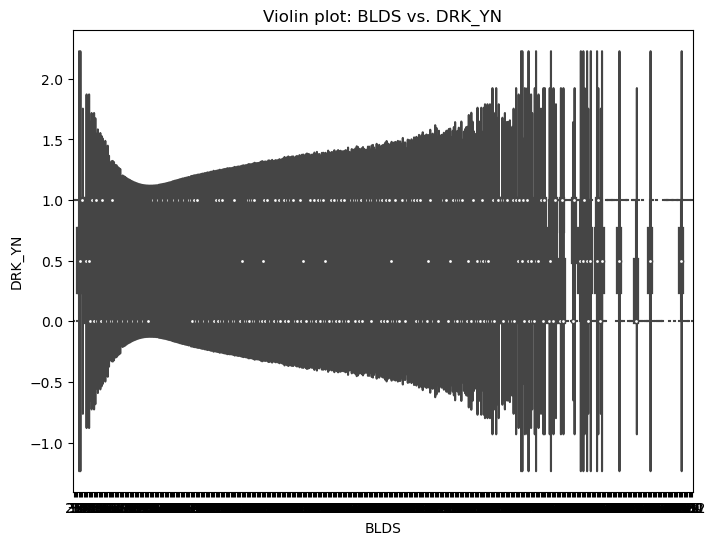

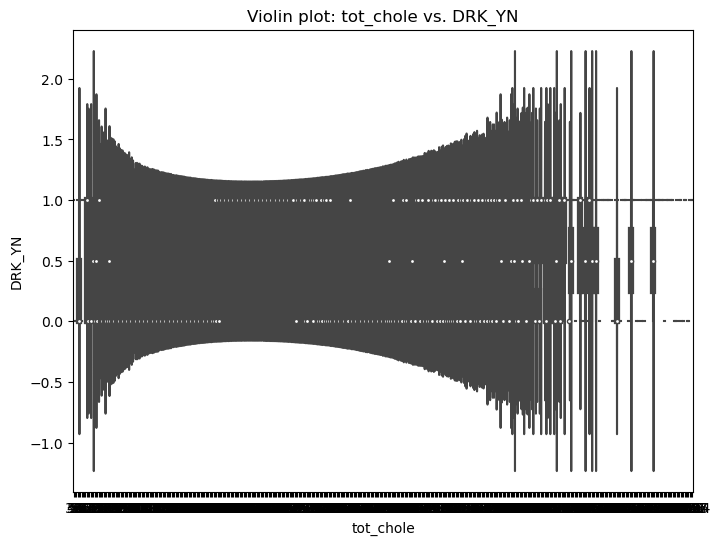

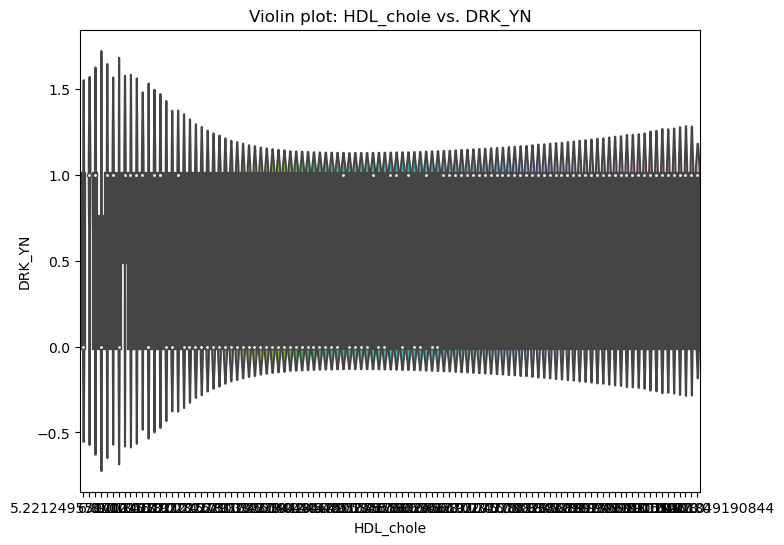

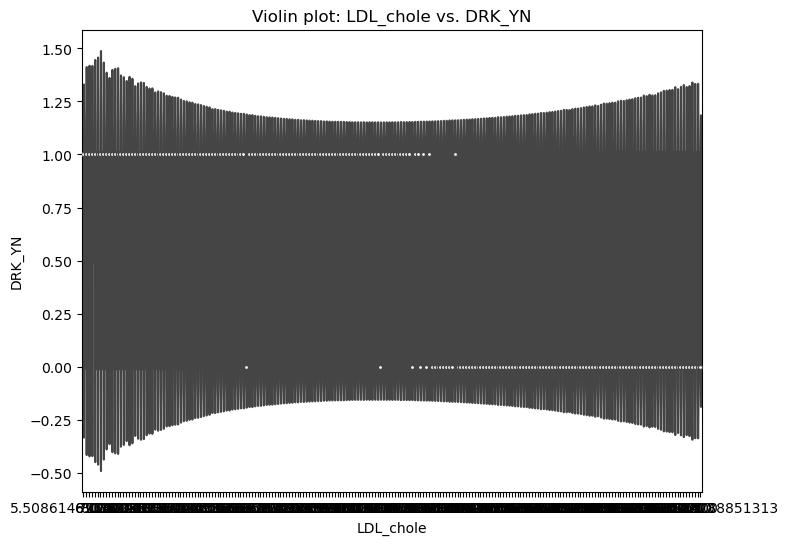

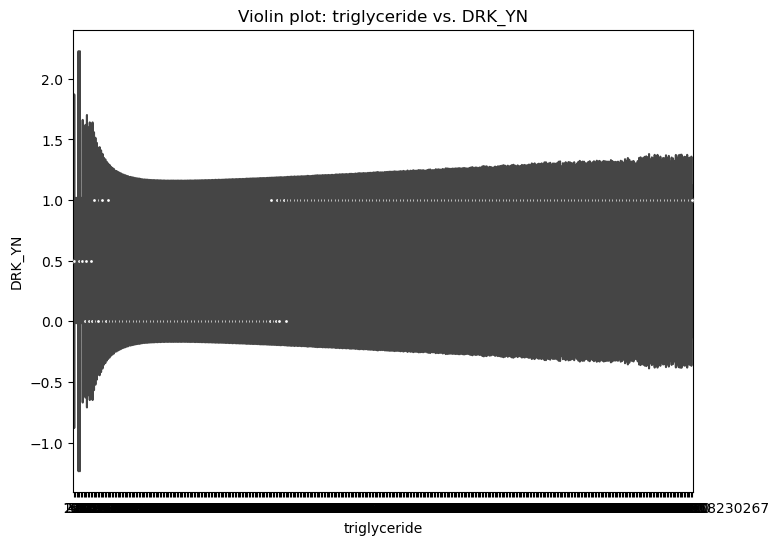

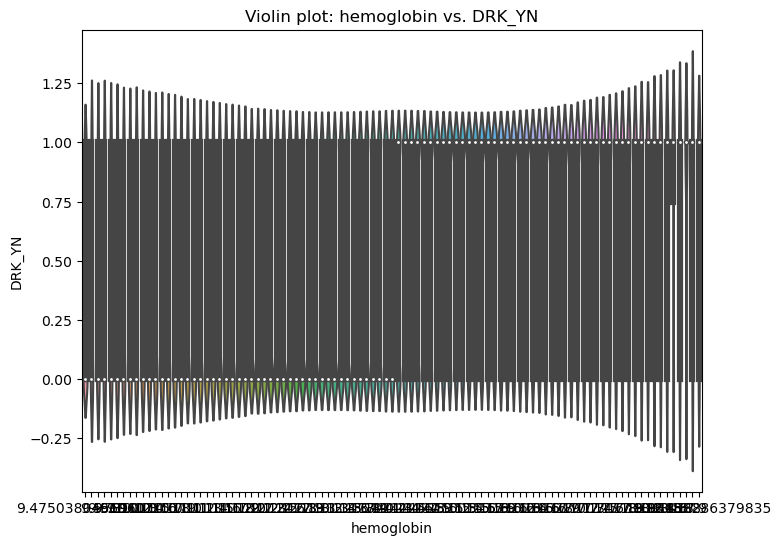

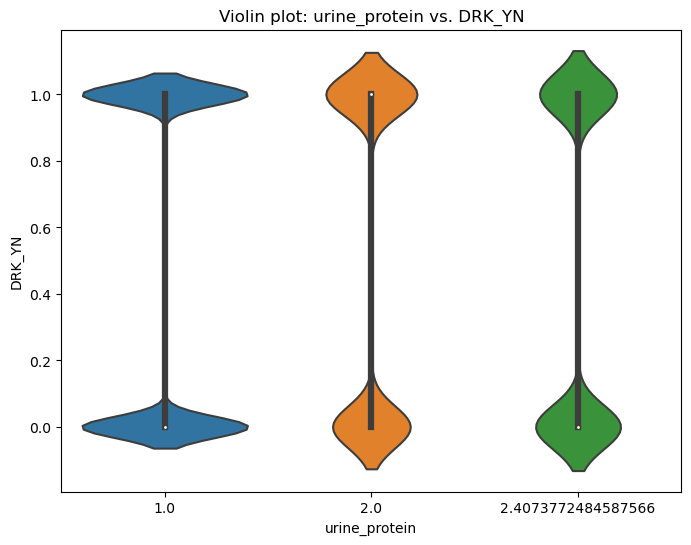

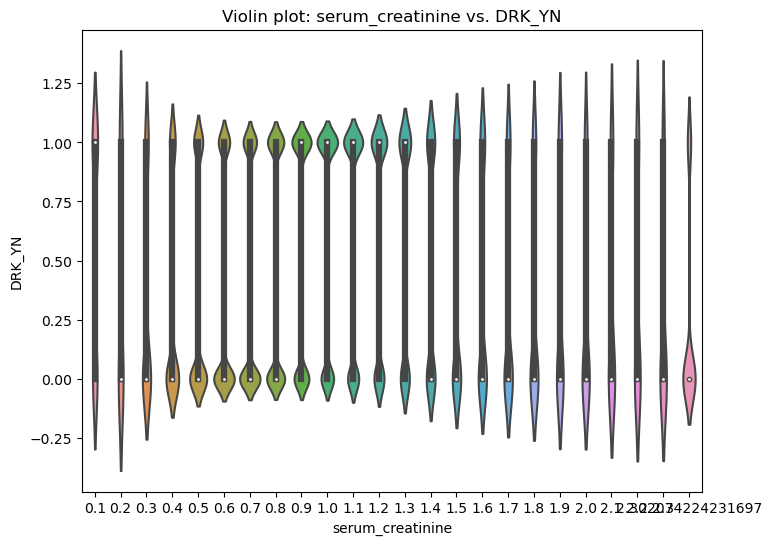

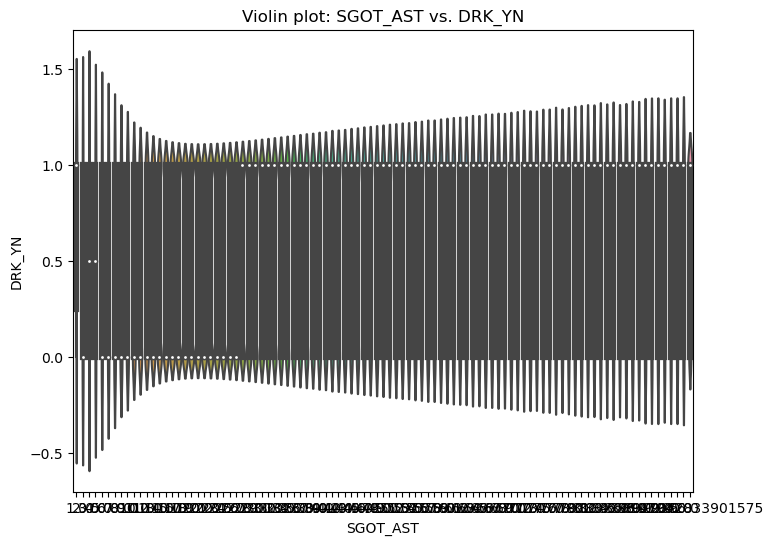

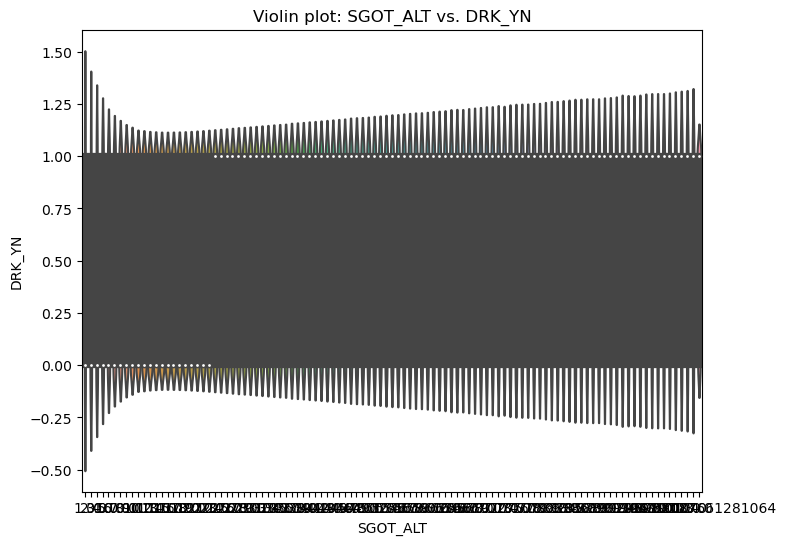

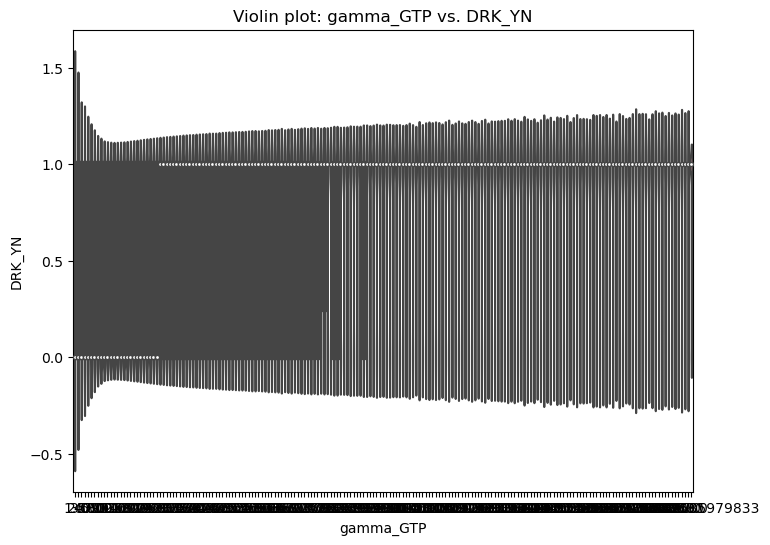

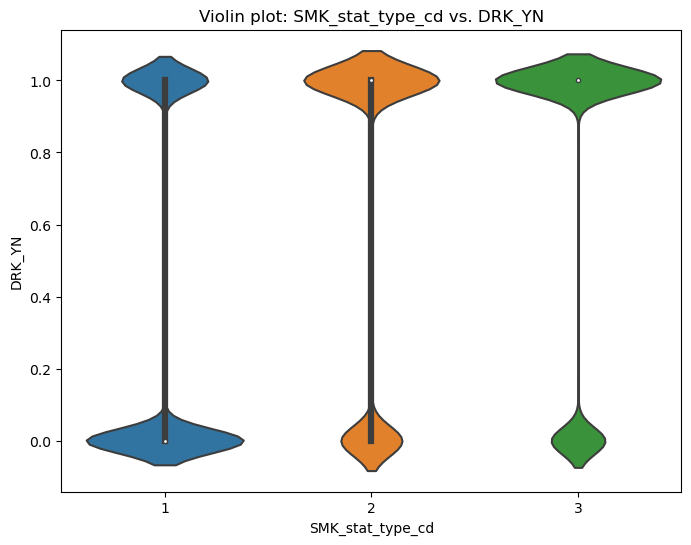

In [25]:
# Violin plot
for independent_column in df.columns[:-1]:  # Exclude the dependent variable
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=independent_column, y='DRK_YN', data=df)
    plt.title(f'Violin plot: {independent_column} vs. DRK_YN')
    plt.xlabel(independent_column)
    plt.ylabel('DRK_YN')
    plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  int64  
 1   age               991320 non-null  int64  
 2   height            991320 non-null  float64
 3   weight            991320 non-null  float64
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  int64  
 8   hear_right        991320 non-null  int64  
 9   SBP               991320 non-null  int64  
 10  DBP               991320 non-null  int64  
 11  BLDS              991320 non-null  int64  
 12  tot_chole         991320 non-null  int64  
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        99

In [27]:
df1=df
df1

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170.0,75.0,90.0,1.0,1.0,1,1,120,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,1
1,0,30,180.0,80.0,89.0,0.9,1.2,1,1,130,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3,0
2,0,40,165.0,75.0,91.0,1.2,1.5,1,1,120,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1,0
3,0,50,175.0,80.0,91.0,1.5,1.2,1,1,145,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1,0
4,0,50,165.0,60.0,80.0,1.0,1.2,1,1,138,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175.0,80.0,92.1,1.5,1.5,1,1,114,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1,0
991342,0,35,170.0,75.0,86.0,1.0,1.5,1,1,119,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1,0
991343,1,40,155.0,50.0,68.0,1.0,0.7,1,1,110,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3,1
991344,0,25,175.0,60.0,72.0,1.5,1.0,1,1,119,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1,0


In [28]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170.0,75.0,90.0,1.0,1.0,1,1,120,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,1
1,0,30,180.0,80.0,89.0,0.9,1.2,1,1,130,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3,0
2,0,40,165.0,75.0,91.0,1.2,1.5,1,1,120,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1,0
3,0,50,175.0,80.0,91.0,1.5,1.2,1,1,145,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1,0
4,0,50,165.0,60.0,80.0,1.0,1.2,1,1,138,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175.0,80.0,92.1,1.5,1.5,1,1,114,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1,0
991342,0,35,170.0,75.0,86.0,1.0,1.5,1,1,119,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1,0
991343,1,40,155.0,50.0,68.0,1.0,0.7,1,1,110,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3,1
991344,0,25,175.0,60.0,72.0,1.5,1.0,1,1,119,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1,0


In [29]:
#Dropping the columns with near 0 correlation with smoking and drinking columns
df = df.drop(['hear_left','hear_right','LDL_chole','urine_protein','BLDS','tot_chole','SBP','SGOT_AST'],axis =1)
df = df.drop(['sight_left','sight_right','DBP','SGOT_ALT','serum_creatinine','waistline','HDL_chole'],axis =1)
df

,sex,age,height,weight,triglyceride,hemoglobin,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170.0,75.0,92.0,17.1,40.0,1,1
1,0,30,180.0,80.0,121.0,15.8,27.0,3,0
2,0,40,165.0,75.0,104.0,15.8,68.0,1,0
3,0,50,175.0,80.0,106.0,17.6,18.0,1,0
4,0,50,165.0,60.0,104.0,13.8,25.0,1,0
...,...,...,...,...,...,...,...,...,...
991341,0,45,175.0,80.0,132.0,15.0,27.0,1,0
991342,0,35,170.0,75.0,45.0,15.8,15.0,1,0
991343,1,40,155.0,50.0,157.0,14.3,17.0,3,1
991344,0,25,175.0,60.0,53.0,14.5,17.0,1,0


In [30]:
%%time
#Now trying Multioutput classifier with k nearest neighbours with 3 neighbours
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import sys

knn = KNeighborsClassifier(n_neighbors=3)
classifier = MultiOutputClassifier(knn, n_jobs=-1)

X = df.drop(columns = ['SMK_stat_type_cd','DRK_YN'])
y = df[['SMK_stat_type_cd','DRK_YN']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)
score = classifier.score(X_test,np.array(y_test))
print("Accuracy obtained by using Multioutput classifier with 3 neighbours on Drinking and smoking columns:",score)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(classifier)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Multioutput classifier with 3 neighbours on Drinking and smoking columns: 0.42373300246136464
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 163 ms, sys: 346 ms, total: 508 ms
Wall time: 15.2 s


In [31]:
%%time
#Now trying Multioutput classifier with k nearest neighbours with 40 neighbours
knn = KNeighborsClassifier(n_neighbors=40)
classifier = MultiOutputClassifier(knn, n_jobs=-1)

X = df.drop(columns = ['SMK_stat_type_cd','DRK_YN'])
y = df[['SMK_stat_type_cd','DRK_YN']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

classifier.fit(X_train,y_train)

predictions = classifier.predict(X_test)
score = classifier.score(X_test,np.array(y_test))
print("Accuracy obtained by using Multioutput classifier with 40 neighbours on Drinking and smoking columns:",score)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(classifier)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Multioutput classifier with 40 neighbours on Drinking and smoking columns: 0.4822358068030505
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 158 ms, sys: 309 ms, total: 467 ms
Wall time: 36.6 s


In [32]:
%%time
#Now trying DecisionTree classifier for drinkers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns = 'DRK_YN')
y = df['DRK_YN']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.01)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print("Accuracy obtained by using Decision Tree classifier on Drinkers column:",score)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Decision Tree classifier on Drinkers column: 0.6330441799475489
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 3.16 s, sys: 98.7 ms, total: 3.26 s
Wall time: 3.26 s


In [33]:
%%time
#Now trying DecisionTree classifier for smokers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns = 'SMK_stat_type_cd')
y = df['SMK_stat_type_cd']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.01)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print("Accuracy obtained by using Decision Tree classifier on Smokers column:",score)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")


Accuracy obtained by using Decision Tree classifier on Smokers column: 0.6219487593302401
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 3.06 s, sys: 108 ms, total: 3.17 s
Wall time: 3.18 s


In [34]:
%%time
#Now trying Logistic Regression classifier for drinkers
df=df1
X = df[['sex','age', 'height', 'weight', 'triglyceride', 'DBP','hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd','serum_creatinine']]
y = df['DRK_YN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, fit_intercept=True)  # Set fit_intercept=False
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained by using Logistic Regression classifier on Drinking column:", accuracy)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Logistic Regression classifier on Drinking column: 0.7140176734051568
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 2.01 s, sys: 4.05 s, total: 6.06 s
Wall time: 696 ms


In [35]:
%%time
#Now trying Logistic Regression classifier for smokers
df=df1
X = df[['sex','age', 'height', 'weight','waistline','HDL_chole', 'triglyceride','SBP', 'DBP','hemoglobin', 'gamma_GTP','SGOT_AST','SGOT_ALT','DRK_YN','serum_creatinine']]
y = df['SMK_stat_type_cd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, fit_intercept=True)  # Set fit_intercept=False
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained by using Logistic Regression classifier on Smoking column:", accuracy)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Logistic Regression classifier on Smoking column: 0.6948714844853326
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 12.3 s, sys: 16.3 s, total: 28.6 s
Wall time: 2.67 s


In [36]:
%%time
#Now trying Random Forest classifier for drinkers

df=df1
X = df[['sex','age', 'height', 'weight', 'triglyceride', 'DBP','hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd','serum_creatinine']]
y = df['DRK_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained by using Random Forest classifier on Drinking column:", accuracy)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Random Forest classifier on Drinking column: 0.7140681112052617
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 1min 24s, sys: 4.56 s, total: 1min 29s
Wall time: 1min 27s


In [37]:
%%time
#Now trying Random Forest classifier for smokers
df=df1
X = df[['sex','age', 'height', 'weight','waistline','HDL_chole', 'triglyceride','SBP', 'DBP','hemoglobin', 'gamma_GTP','SGOT_AST','SGOT_ALT','DRK_YN','serum_creatinine']]
y = df['SMK_stat_type_cd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy obtained by using Random Forest classifier on Smoking column:", accuracy)
# Get the memory usage of the classifier in bytes
memory_usage_bytes = sys.getsizeof(model)

# Convert to other units (e.g., megabytes)
memory_usage_megabytes = memory_usage_bytes / (1024 * 1024)

print(f"Memory Usage (bytes): {memory_usage_bytes} bytes")
print(f"Memory Usage (megabytes): {memory_usage_megabytes} MB")

Accuracy obtained by using Random Forest classifier on Smoking column: 0.7004952991970302
Memory Usage (bytes): 48 bytes
Memory Usage (megabytes): 4.57763671875e-05 MB
CPU times: user 1min 41s, sys: 3.5 s, total: 1min 44s
Wall time: 1min 44s


In [38]:
# So I tried multiple classifiers.  
# Multioutput classifiers were interesting as they allowed me to bring together multiple outputs using a single classifier
# I abandoned it because the two output were strongly correlated and I wanted to see how different classifiers work 
# K nearest neighbour was slow and did not give me high accuracy.  The best accuracy was close to 50%
# Decision tree was the next classifier.  It gave me close to 60% accuracy
# Logistic regression was better with close to 70% accuracy
# Random forest also gave me close to 70% accuracy

In [39]:
# should have renamed the columns for better visibility but doing it now
df.rename(columns={"DRK_YN": "Drink?"}, inplace=True)
df.rename(columns={"SMK_stat_type_cd": "Smoking status type"}, inplace=True)
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,Smoking status type,Drink?
0,0,35,170.0,75.0,90.0,1.0,1.0,1,1,120,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1,1
1,0,30,180.0,80.0,89.0,0.9,1.2,1,1,130,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3,0
2,0,40,165.0,75.0,91.0,1.2,1.5,1,1,120,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1,0
3,0,50,175.0,80.0,91.0,1.5,1.2,1,1,145,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1,0
4,0,50,165.0,60.0,80.0,1.0,1.2,1,1,138,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,0,45,175.0,80.0,92.1,1.5,1.5,1,1,114,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1,0
991342,0,35,170.0,75.0,86.0,1.0,1.5,1,1,119,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1,0
991343,1,40,155.0,50.0,68.0,1.0,0.7,1,1,110,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3,1
991344,0,25,175.0,60.0,72.0,1.5,1.0,1,1,119,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1,0
